# Figure 2

Here I read in a bunch of analyses and combine them to create Figure 2 of the manuscript. 

In [1]:
from IPython.display import clear_output

In [2]:
import NotebookImport
from Benchmarks.Model_Comparison_MF import *
clear_output()

In [4]:
import HIV_Age_Advancement as primary
clear_output()

In [5]:
import seaborn as sns

sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("white")

In [6]:
control_color = (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
hiv_color = (0.3333333333333333, 0.6588235294117647, 0.40784313725490196)

In [7]:
m1_adj.dropna().shape

(1242,)

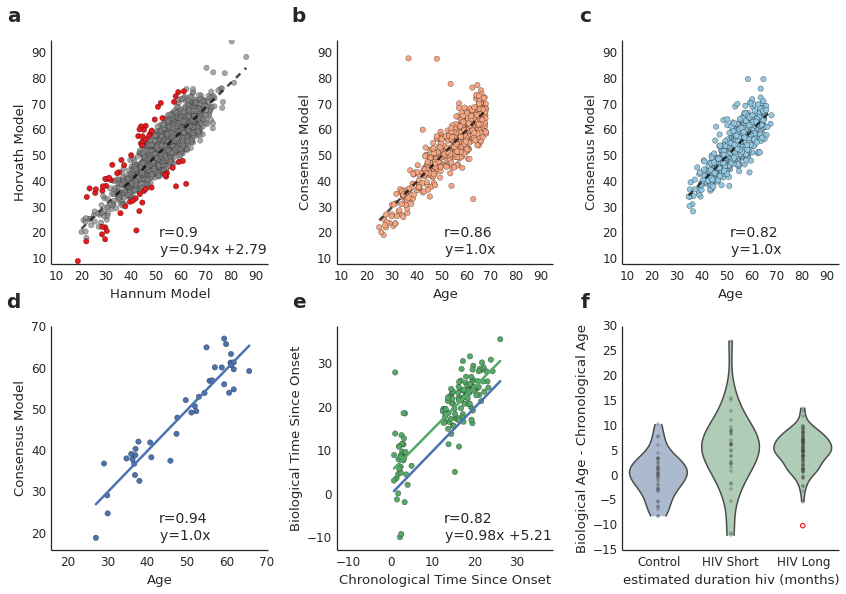

In [8]:
m1_adj.name = 'Hannum Model'
m2_adj.name = 'Horvath Model'
age.name = 'Age'

fig, ax2 = subplots(2,3, figsize=(12,8))

axs = ax2[0]
ax = axs[0]
ll = {'color':'black','alpha':.7, 'ls':'--'}

plot_regression(m1_adj, m2_adj.ix[ti(diff < .2)], ax=ax, s=30,
                line_args=[ll,{'alpha':0}],
                color='grey', edgecolor='black', alpha=.7)
series_scatter(m1_adj, m2_adj.ix[ti(diff > .2)], color=colors[0], 
               ax=ax, alpha=1, edgecolor='black', ann=None,
               s=30)
plot_regression(age.ix[ti(labels == 's1')], mc_adj_c, ax=axs[1],
                line_args=[ll,{'alpha':0}],
                s=30, color=colors_st[1], alpha=1, edgecolor='black')
plot_regression(age.ix[ti(labels == 's3')], mc_adj_c, ax=axs[2],
                line_args=[ll,{'alpha':0}],
                s=30, color=colors_st[2], alpha=1, edgecolor='black')
for ax in axs:
    ax.set_xlim(8,95)
    ax.set_ylim(8,95)
    

plot_regression(age, primary.pred_c.ix[ti(duration=='Control')], ax=ax2[1][0],
                s=30, color=control_color, alpha=1, edgecolor='black',
                line_args=[{'color':control_color,'alpha':1, 'ls':'-'},
                           {'alpha':0}])
ax2[1][0].set_ylabel('Consensus Model')

plot_regression(primary.a2, primary.p2, ax=ax2[1][1],
                s=30, color=hiv_color, alpha=1, edgecolor='black',
                line_args=[{'color':hiv_color,'alpha':1, 'ls':'-'},
                           {'color':control_color,'alpha':1, 'ls':'-'}])
ax2[1][1].set_xlabel('Chronological Time Since Onset')
ax2[1][1].set_ylabel('Biological Time Since Onset')

ax = ax2[1][2]
zscore = lambda s: (s - s.mean()) / s.std()
residual = primary.pred_c - clinical.age
e2 = residual.groupby(duration).apply(zscore)
sns.violinplot(residual[e2.abs() < 3], duration, ax=ax, 
               order=['Control','HIV Short','HIV Long'],
               inner='points', inner_kws={"ms": 8}, alpha=.5,
               bw='scott', cut=0, color=[control_color,
                                         hiv_color, hiv_color])
x = duration.map({'Control':1, 'HIV Short':2, 'HIV Long':3})
series_scatter(x, residual[e2.abs() > 3], color='white', edgecolor='red',
               alpha=1, s=20, lw=1, ax=ax, ann=None)
ax.set_ylabel('Biological Age - Chronological Age')

prettify_ax(ax)
letters = list(map(chr, range(97, 123)))[:6] 
for i,ax in enumerate(ax2.flatten()):
    ax.text(-0.15, 1.15, letters[i], transform=ax.transAxes,
            fontsize=20, fontweight='bold', va='top', ha='right')
    prettify_ax(ax)
fig.tight_layout()
fig.savefig(FIGDIR + 'Fig2.pdf')

In [9]:
linear_regression(primary.a2, primary.p2)

intercept    5.21e+00
p-value      1.88e-33
r-value      8.18e-01
slope        9.79e-01
stderr       6.00e-02
dtype: float64

In [10]:
from Setup.MethylationAgeModels import hannum_model, horvath_model

In [11]:
detection_p = pd.read_hdf(HDFS_DIR + 'dx_methylation.h5', 'detection_p')
detection_p = detection_p[detection_p.Sample_Name.isin(diff.index.intersection(m1_adj.index))]
in_model = detection_p[detection_p.level_0.isin(hannum_model.index.union(horvath_model.index))]

In [12]:
v = in_model.groupby('Sample_Name').size().ix[diff.index].fillna(0)
fisher_exact_test(diff > .2, v > 0)

odds_ratio    3.91e+00
p             2.17e-04
dtype: float64

In [13]:
pd.crosstab(diff > .2, v.clip_upper(2))

col_0,0.0,1.0,2.0
row_0,,,
False,1107,44,23
True,55,4,9
